<h1>Gold Price Forecasting</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Gold Price.csv")

In [3]:
df1 = df[["Date","Price"]]

In [4]:
df1.head(3)

,Date,Price
0,2014-01-01,29542
1,2014-01-02,29975
2,2014-01-03,29727


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2227 non-null   object
 1   Price   2227 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [6]:
df1["Date"] = pd.to_datetime(df1["Date"])
df1.index = df1["Date"]

In [7]:
# Dataframe without resampling and interploation 

df_1 = df1.copy(deep=True)
df_1 = df1.drop(["Date"],axis=1)

In [8]:
df1 = df1[["Price"]].resample("D").mean()

In [9]:
df1.isnull().sum()

Price    912
dtype: int64

In [10]:
df1 = df1.interpolate(method="linear",limit_direction="backward")

In [11]:
df1.isnull().sum()

Price    0
dtype: int64

In [12]:
df1.describe()

,Price
count,3139.000000
mean,35254.383243
std,8962.174643
min,24545.000000
25%,28560.750000
50%,30792.333333
75%,45942.500000
max,56117.000000


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

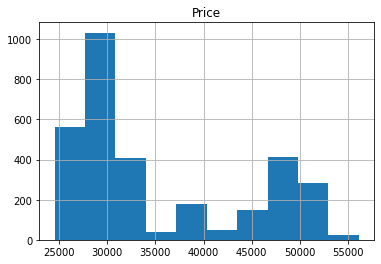

In [13]:
df1.hist()

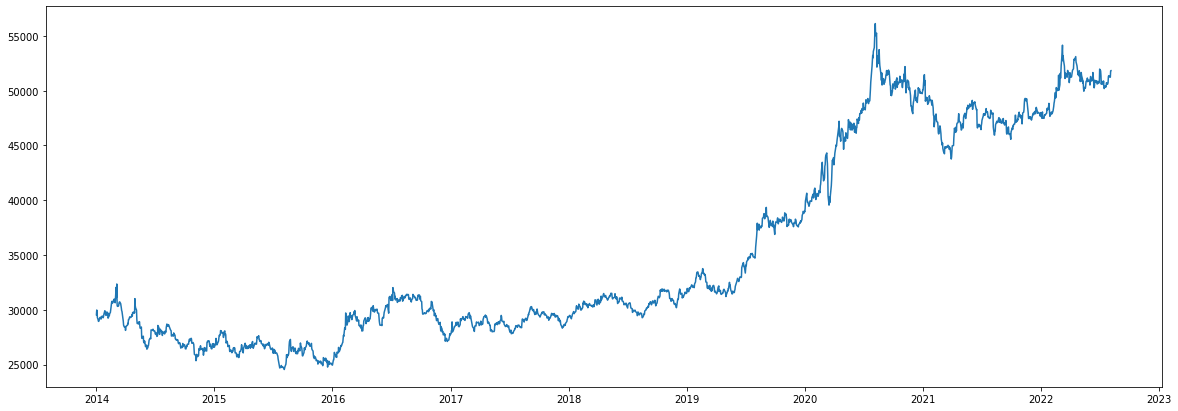

In [14]:
plt.figure(figsize=(20,7))
plt.plot(df1)

In [15]:
import datetime as dt
df["Date"] = pd.to_datetime(df["Date"])
df["month"] = df["Date"].dt.month

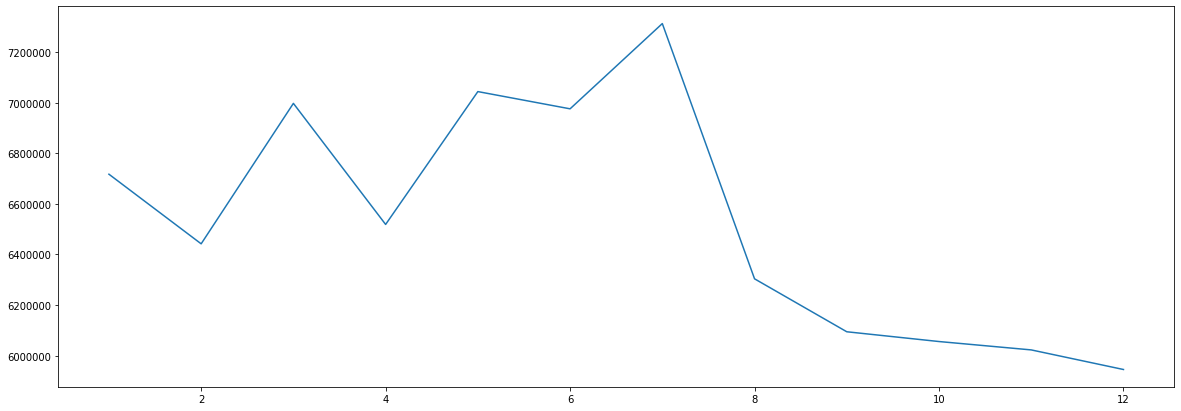

In [16]:
plt.figure(figsize=(20,7))
plt.ticklabel_format(style='plain')
plt.plot(df["Price"].groupby(df["month"]).sum())

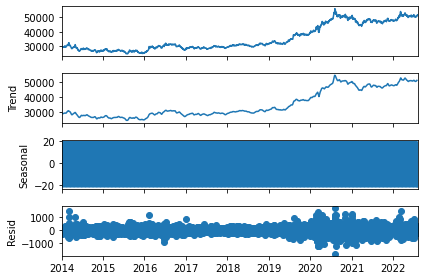

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df1,period=12).plot()
plt.show()

In [18]:
import statsmodels.graphics.tsaplots as tsa_plot

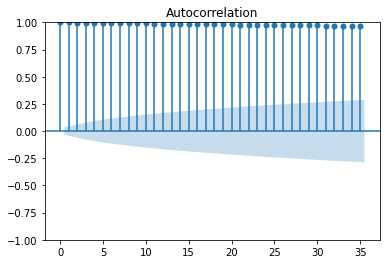

In [19]:
tsa_plot.plot_acf(df1)
plt.show()

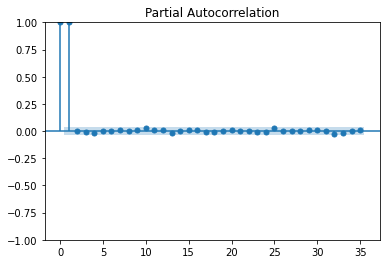

In [20]:
tsa_plot.plot_pacf(df1)
plt.show()

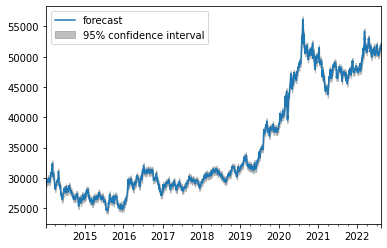

In [22]:
# Using dataframe with resampling and interploation 

from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df1,order=(4,2,1))
model1 = model.fit()

tsa_plot.plot_predict(model1,1,len(df1["Price"]))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No su

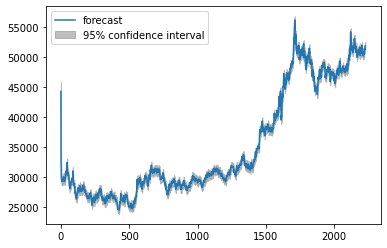

In [23]:
# Using dataframe without resampling and interploation 


from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_1,order=(4,2,1))
model2 = model.fit()

tsa_plot.plot_predict(model2,1,len(df_1))
plt.show()

In [32]:
def show_price(n,model):     # n = number of days from today , model = model1 or model2 
    date = "2022-08-05"
    today = str(dt.date.today())
    
    date = dt.datetime.strptime(date, "%Y-%m-%d").date()
    today = dt.datetime.strptime(today, "%Y-%m-%d").date()
    days =  (today - date).days
    
    dates = pd.date_range("2022-08-06",periods=n+days,freq="D")
    prices = list(model.forecast(n+days))
    df = pd.DataFrame(prices,index=dates,columns=["Price"])
    return df.tail(n)

#  

In [34]:
n = int(input("Enter number of days : "))
show_price(n,model2)

Enter number of days : 15


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Price
2023-10-16,56734.032535
2023-10-17,56745.269470
2023-10-18,56756.506406
2023-10-19,56767.743342
2023-10-20,56778.980277
2023-10-21,56790.217213
2023-10-22,56801.454148
2023-10-23,56812.691084
2023-10-24,56823.928019
2023-10-25,56835.164955


# 